# Problem Set 3

## Data Programming

### Juan Sebastian Lopez Rueda

## Question 1

#### Taking the data from the source

In [2]:
import pandas as pd

users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep="|")

#### Showing some data

In [3]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### Bring the mean age per occupation

In [11]:
age_mean = users.groupby('occupation', as_index=False)['age'].mean()
age_mean

,occupation,age
0,administrator,38.746835
1,artist,31.392857
2,doctor,43.571429
3,educator,42.010526
4,engineer,36.388060
5,entertainment,29.222222
6,executive,38.718750
7,healthcare,41.562500
8,homemaker,32.571429
9,lawyer,36.750000


#### Male ratio per occupation and sorting results

In [17]:
male_ratio = users[(users.gender == 'M')][['occupation','gender']].groupby('occupation').count().sort_values(by='gender')
male_ratio

,gender
occupation,
homemaker,1
none,5
healthcare,5
doctor,7
salesman,9
lawyer,10
retired,13
artist,15
entertainment,16


#### For each occupation gets the min and max ages

In [57]:
max_age = users.groupby('occupation', as_index=False)['age'].max()
min_age = users.groupby('occupation', as_index=False)['age'].min()
table = pd.merge(min_age,max_age, how='inner', on='occupation')
table

,occupation,age_x,age_y
0,administrator,21,70
1,artist,19,48
2,doctor,28,64
3,educator,23,63
4,engineer,22,70
5,entertainment,15,50
6,executive,22,69
7,healthcare,22,62
8,homemaker,20,50
9,lawyer,21,53


#### Mean ages by occupation and gender classification

In [61]:
users.groupby(['occupation','gender'],as_index=False)['age'].mean()

,occupation,gender,age
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


#### Percentages of women and men by occupation

In [85]:
male_total = users[(users.gender == 'M')]['user_id'].count()
female_total = users[(users.gender == 'F')]['user_id'].count()

male_percent = (users[(users.gender == 'M')].groupby('occupation')['user_id'].count() / male_total) * 100
female_percent = (users[(users.gender == 'F')].groupby('occupation')['user_id'].count() / female_total) * 100

table1 = pd.merge(male_percent,female_percent, how='inner', on='occupation')
table1

,user_id_x,user_id_y
occupation,,
administrator,6.417910,13.186813
artist,2.238806,4.761905
educator,10.298507,9.523810
engineer,9.701493,0.732601
entertainment,2.388060,0.732601
executive,4.328358,1.098901
healthcare,0.746269,4.029304
homemaker,0.149254,2.197802
lawyer,1.492537,0.732601


## Question 2

#### Bringing the dataset to work with it

In [86]:
import pandas as pd

euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")

In [87]:
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


#### Selecting only the "Goals" column

In [92]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

#### How many teams participated in the Euro12?

In [97]:
print(f'The number of teams is =',euro12['Team'].count())

The number of teams is = 16


#### Getting the number of columns in the dataset

In [98]:
print(f'The number of columns in the dataset is =',len(euro12.columns))

The number of columns in the dataset is = 35


#### Assing some columns to a new dataframe

In [101]:
discipline = pd.DataFrame(euro12[['Team','Yellow Cards','Red Cards']])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


#### Sorting teams by red cards and yellow cards

In [111]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


#### Calculate the mean "Yellow Cards" given by team

In [114]:
print(f'Mean of Yellow Cards =',discipline['Yellow Cards'].mean())

Mean of Yellow Cards = 7.4375


#### Filter teams that scored more than 6 goals

In [117]:
euro12[(euro12.Goals > 6)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


#### Selecting the teams that starts with letter G

In [119]:
euro12[euro12.Team.str.startswith('G', na=False)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### Select the first 7 columns

In [126]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


#### Select all columns except last 3

In [132]:
euro12.iloc[:, :len(euro12.columns)-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### Presenting only the shooting accuracy from England, Italy, and Russia

In [141]:
print('The Shooting Accuracy for each team is:')
euro12.loc[euro12['Team'].isin(['Russia', 'Italy', 'England'])]['Shooting Accuracy']

The Shooting Accuracy for each team is:


3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object

## Question 3

#### Random numbers

In [1]:
import numpy as np
import pandas as pd

first = np.random.randint(1, 5, size=100)
second = np.random.randint(1, 4, size=100)
third = np.random.randint(10000, 30001, size=100)


#### Creating a DataFrame joining the series created before

In [7]:
handle = pd.DataFrame({'bedrs':first[:], 'bathrs':second[:], 'price_sqr_meter':third[:]})
handle

,bedrs,bathrs,price_sqr_meter
0,4,3,15490
1,3,1,13823
2,4,1,13702
3,3,2,26387
4,2,2,23519
...,...,...,...
95,4,2,25897
96,1,1,16164
97,1,2,12294
98,4,2,14950


#### Creating one column DataFrame with all of the series

In [19]:
long_arr = np.concatenate((first, second, third), axis=0)
#long_arr
long_data = pd.DataFrame({'bigcolumn':long_arr[:]})
long_data

,bigcolumn
0,4
1,3
2,4
3,3
4,2
...,...
295,25897
296,16164
297,12294
298,14950


## Question 4

#### Wind Statistics

In [2]:
import pandas as pd
import numpy as np

d = {'Yr': [61,61,61],
     'Mo': [1,1,1],
     'Dy': [1,2,3],
     'RPT': [15.04,14.71,18.50],
     'VAL': [14.96,np.nan,16.88],
     'ROS': [13.17,10.83,12.33],
     'KIL': [9.29,6.50,10.13],
     'SHA': [np.nan,12.62,11.17],
     'BIR': [9.87,7.67,6.17],
     'DUB': [13.67,11.50,11.25],
     'CLA': [10.25,10.04,np.nan],
     'MUL': [10.83,9.79,8.50],
     'CLO': [12.58,9.67,7.67],
     'BEL': [18.50,17.54,12.75],
     'MAL': [15.04,13.83,12.71]
    }
wind = pd.DataFrame(data=d)
wind

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


#### Merge the first three columns into one and convert it into datetime field

In [13]:
from datetime import datetime
wind['Date'] = wind[wind.columns[0:3]].apply(lambda x: '-'.join(x.astype(str)),axis=1)
wind['Date']= pd.to_datetime(wind['Date'])
data = wind

#### Change the year 2061 to 2016 and droping original columns

In [16]:
data['Date'] = data['Date'].apply(lambda x: x.replace(year = 2016))
data = data.drop(['Yr','Mo','Dy'], axis=1)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2016-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2016-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2016-01-03


#### Missing and non-missing values into the dataframe

In [22]:
print(f'Missing values over the entire record :',data.isnull().sum().sum())
print(f'Non-Missing values over the entire record :',data.count().sum())

Missing values over the entire record : 3
Non-Missing values over the entire record : 36


#### Calculate the mean windspeeds

In [35]:
data.loc[:,data.columns != 'Date'].sum(skipna=True).mean()

32.99666666666667

#### Creating a new DataFrame

In [53]:
mean_df=data.loc[:,data.columns != 'Date'].mean(axis=1)
min_df=data.loc[:,data.columns != 'Date'].min(axis=1)
max_df=data.loc[:,data.columns != 'Date'].max(axis=1)
std_df=data.loc[:,data.columns != 'Date'].std(axis=1)

day_stats = pd.DataFrame({'min':min_df, 'max':max_df, 'mean':mean_df, 'std':std_df})
day_stats


,min,max,mean,std
0,9.29,18.50,13.018182,2.808875
1,6.50,17.54,11.336364,3.188994
2,6.17,18.50,11.641818,3.681912


#### Average windspeed in january

In [81]:
#data[(data.Date == '2016-01')].groupby('Date').mean()
inf_date = data[(pd.DatetimeIndex(data['Date']).month == 1)]
inf_date.loc[:,inf_date.columns != 'Date'].mean(axis=0)

RPT    16.083333
VAL    15.920000
ROS    12.110000
KIL     8.640000
SHA    11.895000
BIR     7.903333
DUB    12.140000
CLA    10.145000
MUL     9.706667
CLO     9.973333
BEL    16.263333
MAL    13.860000
dtype: float64

## Question 5

#### Assing data to variable chipo

In [2]:
import pandas as pd
import numpy as np

chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')

#### Printing the first 10 entries

In [92]:
chipo.iloc[:10,:]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### What is the number of observations and columns in the dataset

In [97]:
print(f'The number of observations is :',chipo.shape[0])
print(f'The number of columns is :',chipo.shape[1])

The number of observations is : 4622
The number of columns is : 5


#### Print the name of all the columns

In [101]:
list(chipo.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

#### How is the dataset indexed

In [102]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### What was the most ordered item

In [103]:
chipo['item_name'].mode()

0    Chicken Bowl
Name: item_name, dtype: object

#### For the most ordered item, how many items were ordered?

In [111]:
print('The number of items for the most ordered item was:')
chipo[(chipo.item_name == 'Chicken Bowl')]['quantity'].sum()

The number of items for the most ordered item was:


761

#### What was the most ordered item in the choice_description column?

In [109]:
print('The most ordered item from choice_description column:')
chipo['choice_description'].mode()

The most ordered item from choice_description column


0    [Diet Coke]
Name: choice_description, dtype: object

#### Items Ordered in total

In [112]:
print('Quantity of items ordered in total:')
chipo['quantity'].sum()

Quantity of items ordered in total:


4972

#### Changing the item price type

In [16]:
# First to change the item type it is necessary to drop additional space inside the values and drop the $ symbol
#chipo['item_price'] = chipo['item_price'].str.strip()
#chipo['item_price'] = chipo['item_price'].str.replace("$","")

# Then it is possible to change the item type using the function "astype" and "dtypes"
#chipo['item_price'] = chipo["item_price"].astype(float)

# Changing the item price with lambda
#chipo['item_price'].apply(lambda x: x.astype('float'))

#### How much was the revenue for the period in the dataset? 

In [21]:
revenue = chipo.quantity * chipo.item_price
print(f'The total revenue for the entire sales was :',revenue.sum())

The total revenue for the entire sales was : 39237.02


#### How many order were made in the period?

In [23]:
print(f'The total number of orders is:',chipo['order_id'].count())

The total number of orders is: 4622


#### What is the average revenue amount per order?
#### How many different items are sold?

In [35]:
print(f'The average revenue per order is:',chipo['item_price'].mean().round(decimals=2))
print(f'There were sold :',chipo['item_name'].nunique(),'different items')

The average revenue per order is: 7.46
There were sold : 50 different items


## Question 6

#### Creating a line plot showing the number of marriages and divorces

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

us_mar_div = pd.read_csv("us-marriages-divorces-1867-2014.csv")

In [63]:
us_mar_div[(us_mar_div.Year.isin([1942,1943,1944,1945,1946]))]

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
75,1942,1772000.0,321000.0,134860000,13.1,2.4
76,1943,1577000.0,359000.0,136739000,11.5,2.6
77,1944,1452000.0,400000.0,138397000,10.5,2.9
78,1945,1613000.0,485000.0,139928000,11.5,3.5
79,1946,2291000.0,610000.0,141389000,16.2,4.3


#### Line Chart about Marriages and Divorces

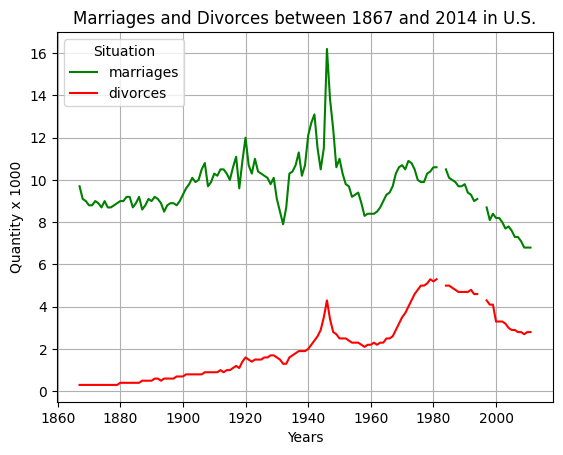

In [69]:
us_mar_div.iloc[:10,:]

fig, ax = plt.subplots()
plt.plot(us_mar_div['Year'], us_mar_div['Marriages_per_1000'], "-g", label="marriages")
plt.plot(us_mar_div['Year'], us_mar_div['Divorces_per_1000'], "-r", label="divorces")
plt.title('Marriages and Divorces between 1867 and 2014 in U.S.')
plt.xlabel('Years')
plt.ylabel('Quantity x 1000')
ax.legend(title='Situation', loc="upper left")
plt.grid(True)
plt.show()


## Question 7

#### Creating a bar chart comparing marriages and divorces in 1900, 1950, and 2000

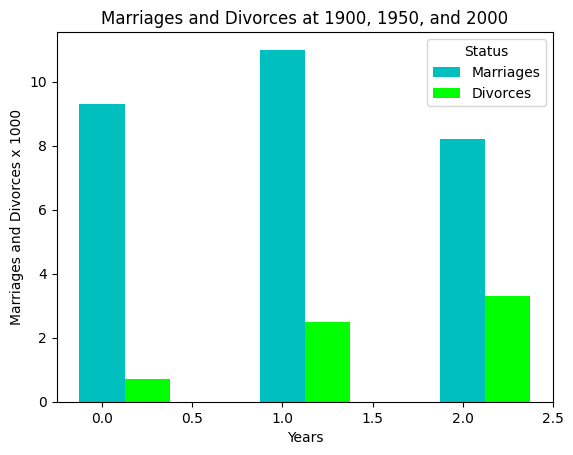

In [16]:
#import matplotlib.pyplot as plt
import numpy as np

years = [1900, 1950, 2000]
ind = np.arange(len(years))
width = 0.25

values_1 = us_mar_div[(us_mar_div.Year.isin([1900,1950,2000]))][['Marriages_per_1000']].values
values_1 = values_1.reshape(-1)

values_2 = us_mar_div[(us_mar_div.Year.isin([1900,1950,2000]))][['Divorces_per_1000']].values
values_2 = values_2.reshape(-1)

plt.bar(ind, values_1, width=width, color='c', label='Marriages')
plt.bar(ind + width, values_2, width=width, color='lime', label='Divorces')



plt.xlabel("Years")
plt.ylabel('Marriages and Divorces x 1000')
plt.title("Marriages and Divorces at 1900, 1950, and 2000")
  
#plt.xticks(ind+width,['1900', '1950', '2000'])
plt.legend(title='Status', loc="upper right")
plt.show()




## Question 8

#### Horizontal bar chart that compares the deadliest actors in Hollywood

In [17]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

actors = pd.read_csv("actor_kill_counts.csv")

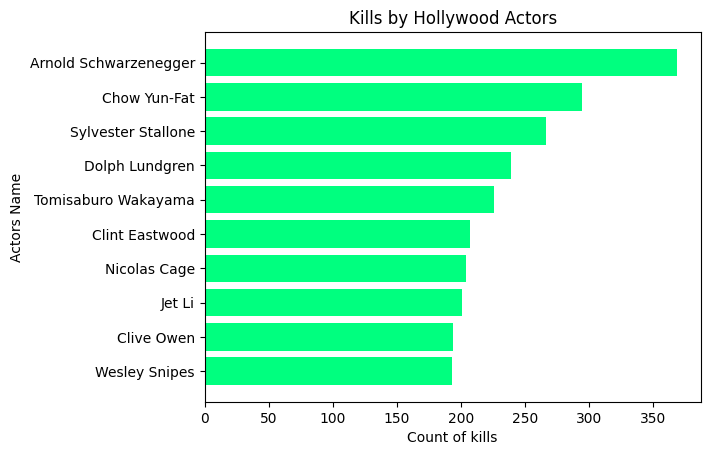

In [39]:
actors = actors.sort_values('Count')
y = actors['Actor'].values
x = actors['Count'].values

plt.barh(y,x, color='springgreen')

plt.ylabel("Actors Name")
plt.xlabel("Count of kills")
plt.title("Kills by Hollywood Actors")

plt.show()


## Question 9

#### Pie chart showing the fraction of all Roman Emperors that were assassinated

In [41]:
#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np

romanEmperor = pd.read_csv("roman-emperor-reigns.csv")

In [48]:
romanEmperor[(romanEmperor.Cause_of_Death == 'Assassinated')][['Emperor','Length_of_Reign']]

,Emperor,Length_of_Reign
2,Caligula,4.83
5,Galba,0.58
7,Vitellius,0.67
10,Domitian,15.00
17,Commodus,15.00
18,Pertinax,0.25
21,Caracalla,19.00
22,Geta,3.00
24,Elagabalus,3.75
25,Severus Alexander,13.00


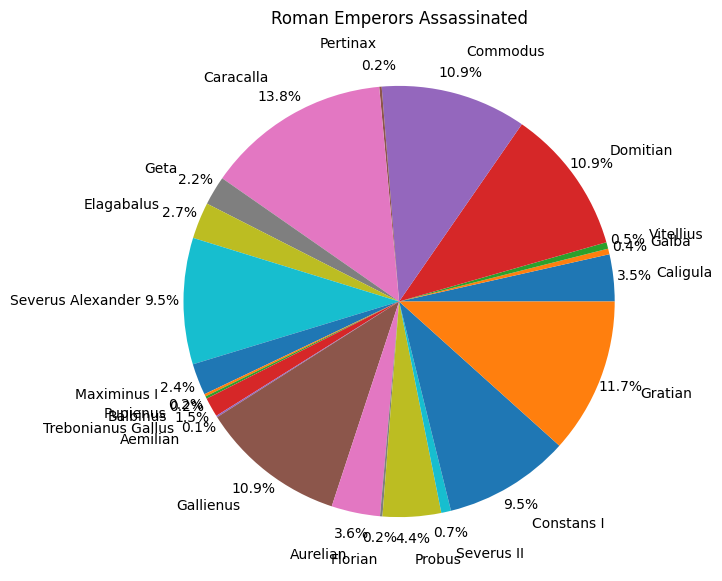

In [77]:
val1 = romanEmperor[(romanEmperor.Cause_of_Death == 'Assassinated')][['Emperor']].values
val1 = val1.reshape(-1)

val2 = romanEmperor[(romanEmperor.Cause_of_Death == 'Assassinated')][['Length_of_Reign']].values
val2 = val2.reshape(-1)

fig = plt.figure(figsize = (22,7))
plt.pie(val2, labels = val1, autopct='%.1f%%', pctdistance=1.1, labeldistance=1.2)

plt.title("Roman Emperors Assassinated")
#plt.legend(title='Status', loc="center right")

plt.show()

## Question 10

#### Creating a scatter plot showing the relationship between total revenue by arcades 

In [78]:
#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np

arc_phd = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

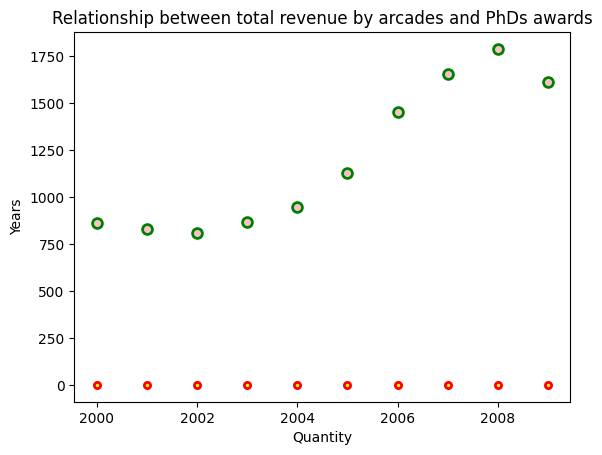

In [93]:
x1 = arc_phd['Year']
x2 = arc_phd['Year']
y1 = arc_phd['Computer Science Doctorates Awarded (US)']
y2 = arc_phd['Total Arcade Revenue (billions)']

plt.scatter(x, y1, c ="pink",
            linewidths = 2,
            edgecolor ="green",
            s = 50)
plt.scatter(x2, y2, c ="yellow",
            linewidths = 2,
            edgecolor ="red",
            s = 20)

plt.xlabel("Quantity")
plt.ylabel("Years")
plt.title("Relationship between total revenue by arcades and PhDs awards")
plt.show()